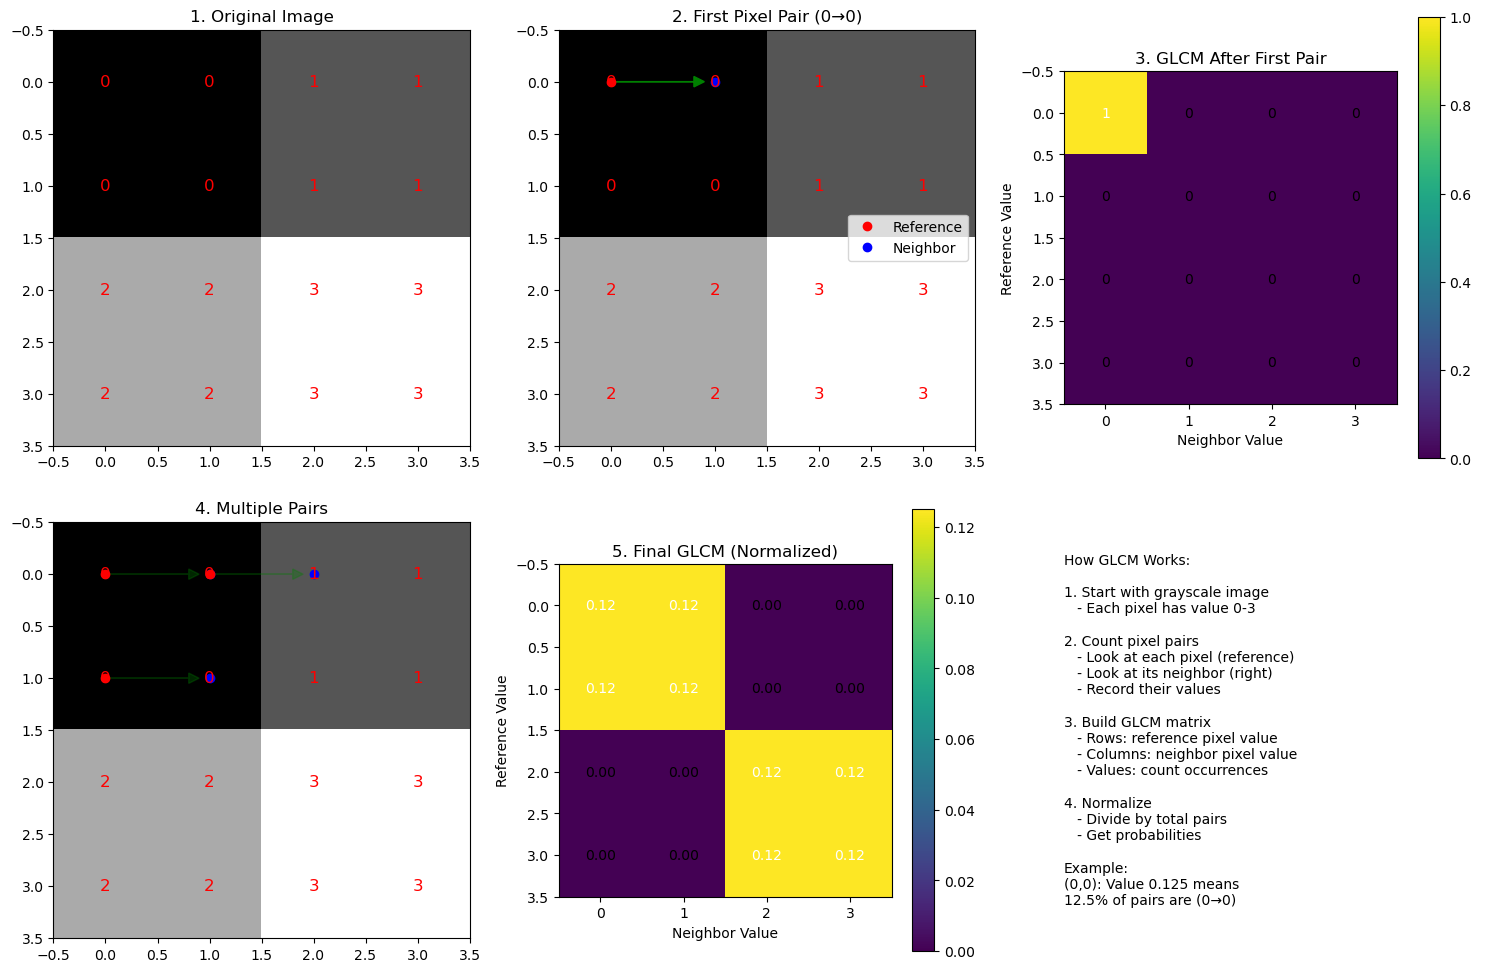

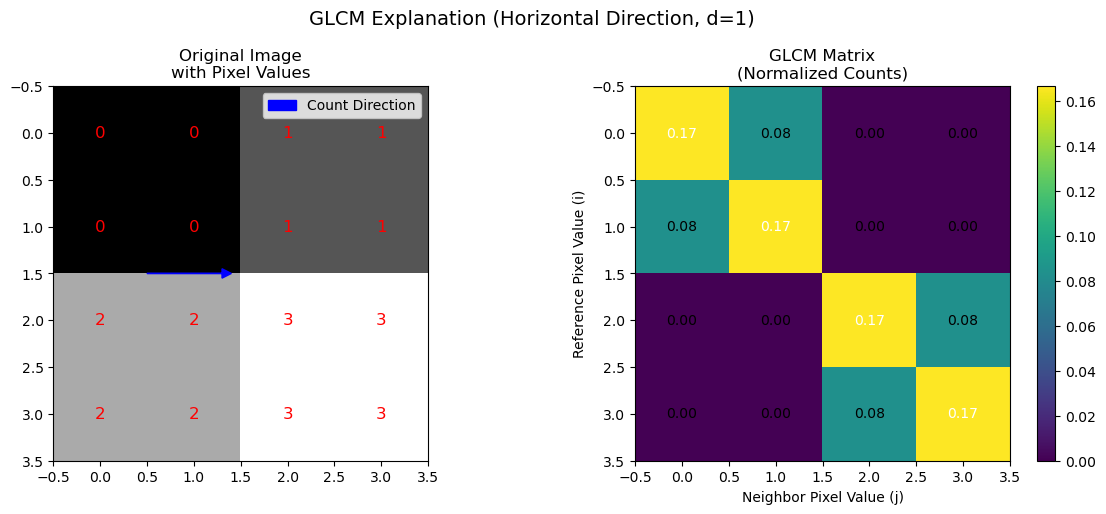

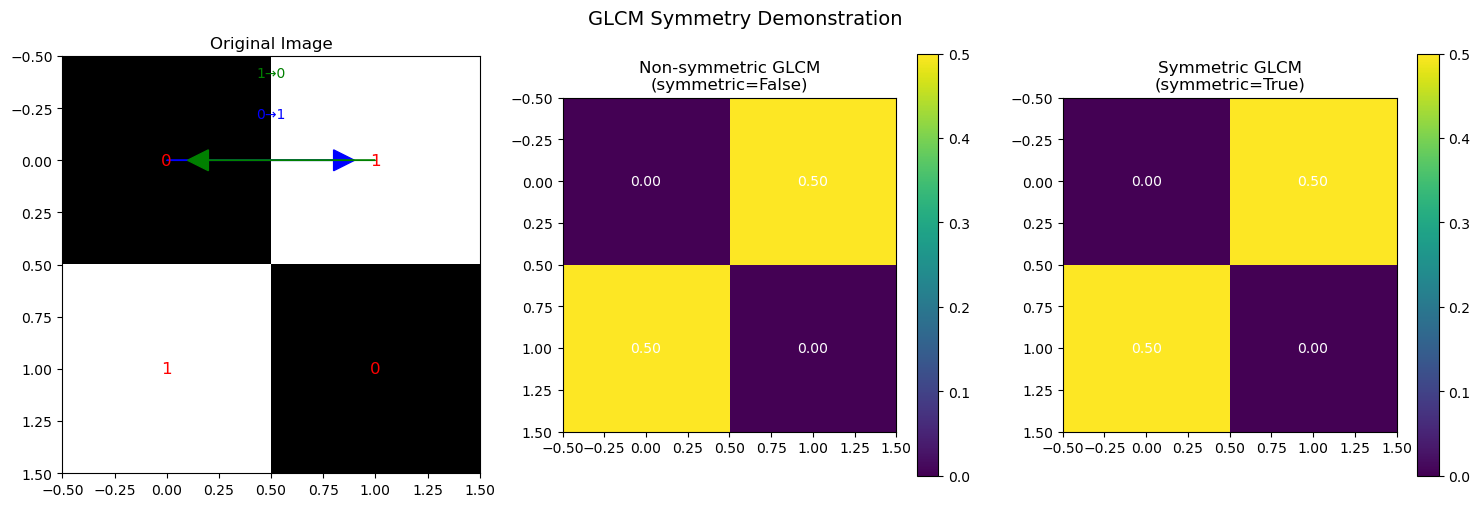


Explanation:
1. In the original image:
   - We have one 0→1 pair (going right)
   - We have one 1→0 pair (going right)

2. Non-symmetric GLCM (symmetric=False):
   - Only counts pairs in one direction
   - Position (0,1) counts 0→1 occurrences
   - Position (1,0) counts 1→0 occurrences

3. Symmetric GLCM (symmetric=True):
   - Counts pairs in both directions
   - Position (0,1) and (1,0) are equal
   - Matrix is symmetric across diagonal
   - Values are normalized (divided by total pairs)

GLCM Features:
contrast: 1.0000
correlation: -1.0000
energy: 0.7071
homogeneity: 0.5000


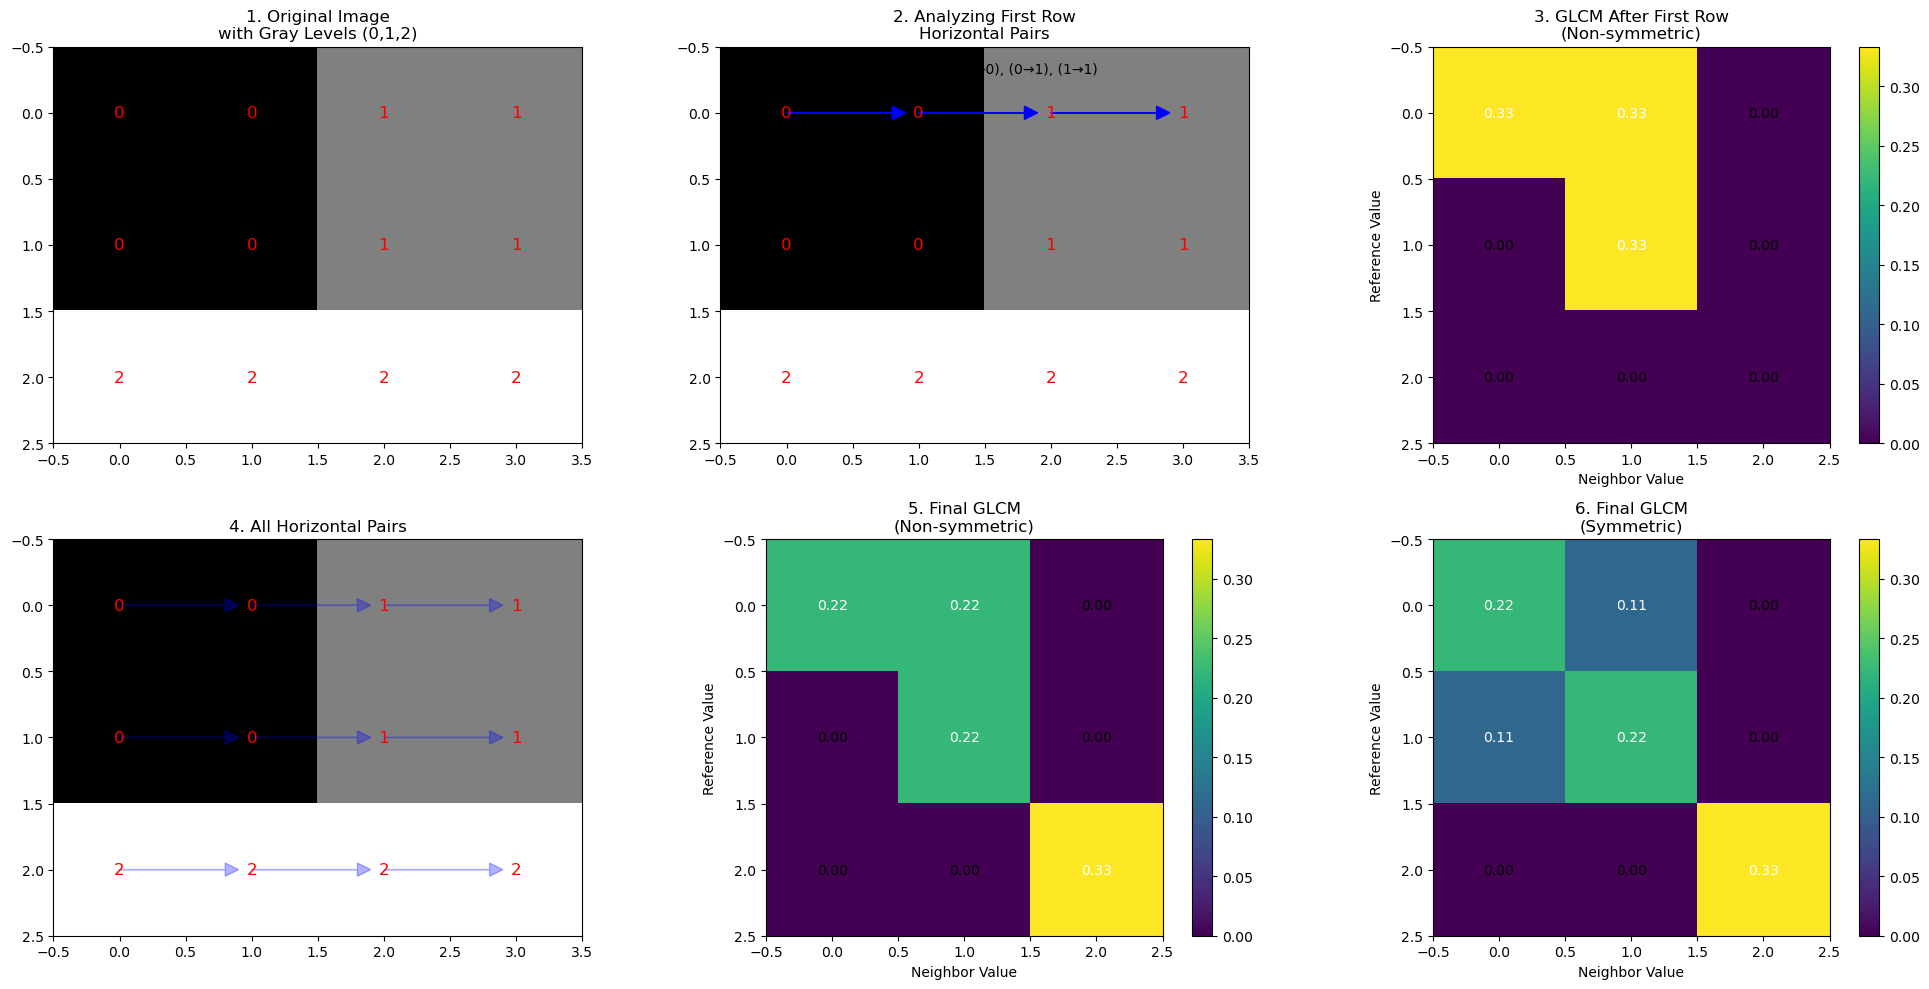


GLCM Construction Process:

1. Start with the image:
   - 3x4 image with 3 gray levels (0,1,2)
   - Looking at horizontal pairs (right neighbors)

2. First Row Analysis:
   - First pair: (0→0)
   - Second pair: (0→1)
   - Third pair: (1→1)

3. Count all pairs in the image:
   Row 1: (0→0), (0→1), (1→1)
   Row 2: (0→0), (0→1), (1→1)
   Row 3: (2→2), (2→2), (2→2)

4. Build GLCM Matrix:
   - Rows: reference pixel value (0,1,2)
   - Columns: neighbor pixel value (0,1,2)
   - Each cell (i,j): count of i→j pairs

5. Symmetric vs Non-symmetric:
   Non-symmetric:
   - Only counts left-to-right pairs
   Symmetric:
   - Counts both directions
   - Adds right-to-left pairs
   - Divides by total pairs to normalize


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Create a simple 4x4 image with only 4 gray levels (0, 1, 2, 3)
image = np.array([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [2, 2, 3, 3],
    [2, 2, 3, 3]
], dtype=np.uint8)

# Create figure with 2x3 subplots
plt.figure(figsize=(15, 10))

# 1. Show original image
plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title('1. Original Image')
# Add pixel values
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(image[i, j]), 
                ha='center', va='center', color='red', fontsize=12)

# 2. Show first pixel pair (0,0)
plt.subplot(232)
plt.imshow(image, cmap='gray')
plt.title('2. First Pixel Pair (0→0)')
# Add pixel values
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(image[i, j]), 
                ha='center', va='center', color='red', fontsize=12)
# Highlight first pair
plt.plot(0, 0, 'ro', label='Reference')
plt.plot(1, 0, 'bo', label='Neighbor')
plt.arrow(0, 0, 0.8, 0, head_width=0.1, head_length=0.1, fc='g', ec='g')
plt.legend()

# 3. Show GLCM matrix after first pair
plt.subplot(233)
glcm = np.zeros((4, 4))
glcm[0, 0] = 1  # First (0,0) pair
plt.imshow(glcm, cmap='viridis')
plt.title('3. GLCM After First Pair')
plt.colorbar()
# Add matrix values
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{glcm[i, j]:.0f}', 
                ha='center', va='center', color='white' if glcm[i, j] > 0 else 'black')
plt.xlabel('Neighbor Value')
plt.ylabel('Reference Value')

# 4. Show multiple pairs
plt.subplot(234)
plt.imshow(image, cmap='gray')
plt.title('4. Multiple Pairs')
# Add pixel values
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(image[i, j]), 
                ha='center', va='center', color='red', fontsize=12)
# Highlight multiple pairs
pairs = [(0,0), (0,1), (1,0)]  # (row, col) for reference pixels
for row, col in pairs:
    plt.plot(col, row, 'ro')
    plt.plot(col+1, row, 'bo')
    plt.arrow(col, row, 0.8, 0, head_width=0.1, head_length=0.1, 
             fc='g', ec='g', alpha=0.3)

# 5. Final GLCM matrix
plt.subplot(235)
final_glcm = np.array([
    [2, 2, 0, 0],
    [2, 2, 0, 0],
    [0, 0, 2, 2],
    [0, 0, 2, 2]
]) / 16  # Normalize
plt.imshow(final_glcm, cmap='viridis')
plt.title('5. Final GLCM (Normalized)')
plt.colorbar()
# Add matrix values
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{final_glcm[i, j]:.2f}', 
                ha='center', va='center', color='white' if final_glcm[i, j] > 0.1 else 'black')
plt.xlabel('Neighbor Value')
plt.ylabel('Reference Value')

# 6. Add explanation
plt.subplot(236)
plt.axis('off')
explanation = """
How GLCM Works:

1. Start with grayscale image
   - Each pixel has value 0-3

2. Count pixel pairs
   - Look at each pixel (reference)
   - Look at its neighbor (right)
   - Record their values

3. Build GLCM matrix
   - Rows: reference pixel value
   - Columns: neighbor pixel value
   - Values: count occurrences

4. Normalize
   - Divide by total pairs
   - Get probabilities

Example:
(0,0): Value 0.125 means
12.5% of pairs are (0→0)
"""
plt.text(0, 0.5, explanation, fontsize=10, ha='left', va='center')

plt.tight_layout()
plt.show()

# Calculate GLCM
glcm = graycomatrix(image, distances=[1], angles=[0], levels=4, symmetric=True, normed=True)
glcm = glcm[:, :, 0, 0]  # Get the 2D GLCM matrix

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('GLCM Explanation (Horizontal Direction, d=1)', fontsize=14)

# Plot 1: Original Image with values
im1 = ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image\nwith Pixel Values')

# Add pixel values
for i in range(4):
    for j in range(4):
        ax1.text(j, i, str(image[i, j]), 
                ha='center', va='center', color='red', fontsize=12)

# Add arrow to show direction
ax1.arrow(0.5, 1.5, 0.8, 0, head_width=0.1, head_length=0.1, 
          fc='blue', ec='blue', label='Count Direction')
ax1.legend()

# Plot 2: GLCM Matrix
im2 = ax2.imshow(glcm, cmap='viridis')
ax2.set_title('GLCM Matrix\n(Normalized Counts)')

# Add labels
ax2.set_xlabel('Neighbor Pixel Value (j)')
ax2.set_ylabel('Reference Pixel Value (i)')

# Add colorbar
plt.colorbar(im2, ax=ax2)

# Add GLCM values
for i in range(4):
    for j in range(4):
        ax2.text(j, i, f'{glcm[i, j]:.2f}', 
                ha='center', va='center', 
                color='white' if glcm[i, j] > 0.1 else 'black')

plt.tight_layout()
plt.show()

# Create a very simple 2x2 image to demonstrate symmetry
image = np.array([
    [0, 1],
    [1, 0]
], dtype=np.uint8)

# Create figure with subplots
plt.figure(figsize=(15, 5))

# 1. Show original image
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
# Add pixel values
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(image[i, j]), 
                ha='center', va='center', color='red', fontsize=12)

# Add arrows to show both directions
plt.arrow(0, 0, 0.8, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
plt.arrow(1, 0, -0.8, 0, head_width=0.1, head_length=0.1, fc='green', ec='green')
plt.text(0.5, -0.2, '0→1', color='blue', ha='center')
plt.text(0.5, -0.4, '1→0', color='green', ha='center')

# 2. Show non-symmetric GLCM
plt.subplot(132)
glcm_nonsym = graycomatrix(image, distances=[1], angles=[0], 
                          levels=2, symmetric=False, normed=True)
glcm_nonsym = glcm_nonsym[:, :, 0, 0]
plt.imshow(glcm_nonsym, cmap='viridis')
plt.title('Non-symmetric GLCM\n(symmetric=False)')
plt.colorbar()
# Add matrix values
for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{glcm_nonsym[i, j]:.2f}', 
                ha='center', va='center', color='white')

# 3. Show symmetric GLCM
plt.subplot(133)
glcm_sym = graycomatrix(image, distances=[1], angles=[0], 
                       levels=2, symmetric=True, normed=True)
glcm_sym = glcm_sym[:, :, 0, 0]
plt.imshow(glcm_sym, cmap='viridis')
plt.title('Symmetric GLCM\n(symmetric=True)')
plt.colorbar()
# Add matrix values
for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{glcm_sym[i, j]:.2f}', 
                ha='center', va='center', color='white')

plt.suptitle('GLCM Symmetry Demonstration', fontsize=14)
plt.tight_layout()
plt.show()

# Print explanation
print("\nExplanation:")
print("1. In the original image:")
print("   - We have one 0→1 pair (going right)")
print("   - We have one 1→0 pair (going right)")
print("\n2. Non-symmetric GLCM (symmetric=False):")
print("   - Only counts pairs in one direction")
print("   - Position (0,1) counts 0→1 occurrences")
print("   - Position (1,0) counts 1→0 occurrences")
print("\n3. Symmetric GLCM (symmetric=True):")
print("   - Counts pairs in both directions")
print("   - Position (0,1) and (1,0) are equal")
print("   - Matrix is symmetric across diagonal")
print("   - Values are normalized (divided by total pairs)")

# Print GLCM features
print("\nGLCM Features:")
properties = ['contrast', 'correlation', 'energy', 'homogeneity']
for prop in properties:
    value = graycoprops(graycomatrix(image, distances=[1], angles=[0], 
                                   levels=4, symmetric=True, normed=True), 
                       prop)[0, 0]
    print(f"{prop}: {value:.4f}")

import numpy as np
import matplotlib.pyplot as plt

# 1. Create a simple 3x4 image with only 3 gray levels (0, 1, 2)
image = np.array([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [2, 2, 2, 2]
], dtype=np.uint8)

def create_glcm(img, symmetric=True):
    """Create GLCM manually to understand the process"""
    levels = 3  # We have 3 gray levels (0,1,2)
    glcm = np.zeros((levels, levels), dtype=int)
    rows, cols = img.shape
    
    # Count occurrences
    for i in range(rows):
        for j in range(cols-1):  # -1 because we look at pairs
            reference = img[i, j]
            neighbor = img[i, j+1]
            glcm[reference, neighbor] += 1
            if symmetric:
                # Also count the pair in reverse
                glcm[neighbor, reference] += 1
    
    # Normalize
    return glcm / glcm.sum()

# Create figure with subplots
plt.figure(figsize=(20, 10))

# 1. Original Image
plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title('1. Original Image\nwith Gray Levels (0,1,2)')
# Add pixel values
for i in range(3):
    for j in range(4):
        plt.text(j, i, str(image[i,j]), 
                ha='center', va='center', color='red', fontsize=12)

# 2. Show First Row Analysis
plt.subplot(232)
plt.imshow(image, cmap='gray')
plt.title('2. Analyzing First Row\nHorizontal Pairs')
# Add pixel values
for i in range(3):
    for j in range(4):
        plt.text(j, i, str(image[i,j]), 
                ha='center', va='center', color='red', fontsize=12)
# Highlight first row pairs
for j in range(3):
    plt.arrow(j, 0, 0.8, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
plt.text(1.5, -0.3, 'Three pairs: (0→0), (0→1), (1→1)', ha='center')

# 3. Show GLCM After First Row
first_row = image[0:1, :]
glcm_first = create_glcm(first_row, symmetric=False)
plt.subplot(233)
plt.imshow(glcm_first, cmap='viridis')
plt.title('3. GLCM After First Row\n(Non-symmetric)')
plt.colorbar()
# Add matrix values
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{glcm_first[i,j]:.2f}', 
                ha='center', va='center', color='white' if glcm_first[i,j] > 0.1 else 'black')
plt.xlabel('Neighbor Value')
plt.ylabel('Reference Value')

# 4. Show All Pairs
plt.subplot(234)
plt.imshow(image, cmap='gray')
plt.title('4. All Horizontal Pairs')
# Add pixel values
for i in range(3):
    for j in range(4):
        plt.text(j, i, str(image[i,j]), 
                ha='center', va='center', color='red', fontsize=12)
# Show all pairs
for i in range(3):
    for j in range(3):
        plt.arrow(j, i, 0.8, 0, head_width=0.1, head_length=0.1, 
                 fc='blue', ec='blue', alpha=0.3)

# 5. Final Non-symmetric GLCM
glcm_nonsym = create_glcm(image, symmetric=False)
plt.subplot(235)
plt.imshow(glcm_nonsym, cmap='viridis')
plt.title('5. Final GLCM\n(Non-symmetric)')
plt.colorbar()
# Add matrix values
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{glcm_nonsym[i,j]:.2f}', 
                ha='center', va='center', color='white' if glcm_nonsym[i,j] > 0.1 else 'black')
plt.xlabel('Neighbor Value')
plt.ylabel('Reference Value')

# 6. Final Symmetric GLCM
glcm_sym = create_glcm(image, symmetric=True)
plt.subplot(236)
plt.imshow(glcm_sym, cmap='viridis')
plt.title('6. Final GLCM\n(Symmetric)')
plt.colorbar()
# Add matrix values
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{glcm_sym[i,j]:.2f}', 
                ha='center', va='center', color='white' if glcm_sym[i,j] > 0.1 else 'black')
plt.xlabel('Neighbor Value')
plt.ylabel('Reference Value')

plt.tight_layout()
plt.show()

# Print detailed explanation
print("\nGLCM Construction Process:")
print("\n1. Start with the image:")
print("   - 3x4 image with 3 gray levels (0,1,2)")
print("   - Looking at horizontal pairs (right neighbors)")

print("\n2. First Row Analysis:")
print("   - First pair: (0→0)")
print("   - Second pair: (0→1)")
print("   - Third pair: (1→1)")

print("\n3. Count all pairs in the image:")
print("   Row 1: (0→0), (0→1), (1→1)")
print("   Row 2: (0→0), (0→1), (1→1)")
print("   Row 3: (2→2), (2→2), (2→2)")

print("\n4. Build GLCM Matrix:")
print("   - Rows: reference pixel value (0,1,2)")
print("   - Columns: neighbor pixel value (0,1,2)")
print("   - Each cell (i,j): count of i→j pairs")

print("\n5. Symmetric vs Non-symmetric:")
print("   Non-symmetric:")
print("   - Only counts left-to-right pairs")
print("   Symmetric:")
print("   - Counts both directions")
print("   - Adds right-to-left pairs")
print("   - Divides by total pairs to normalize")


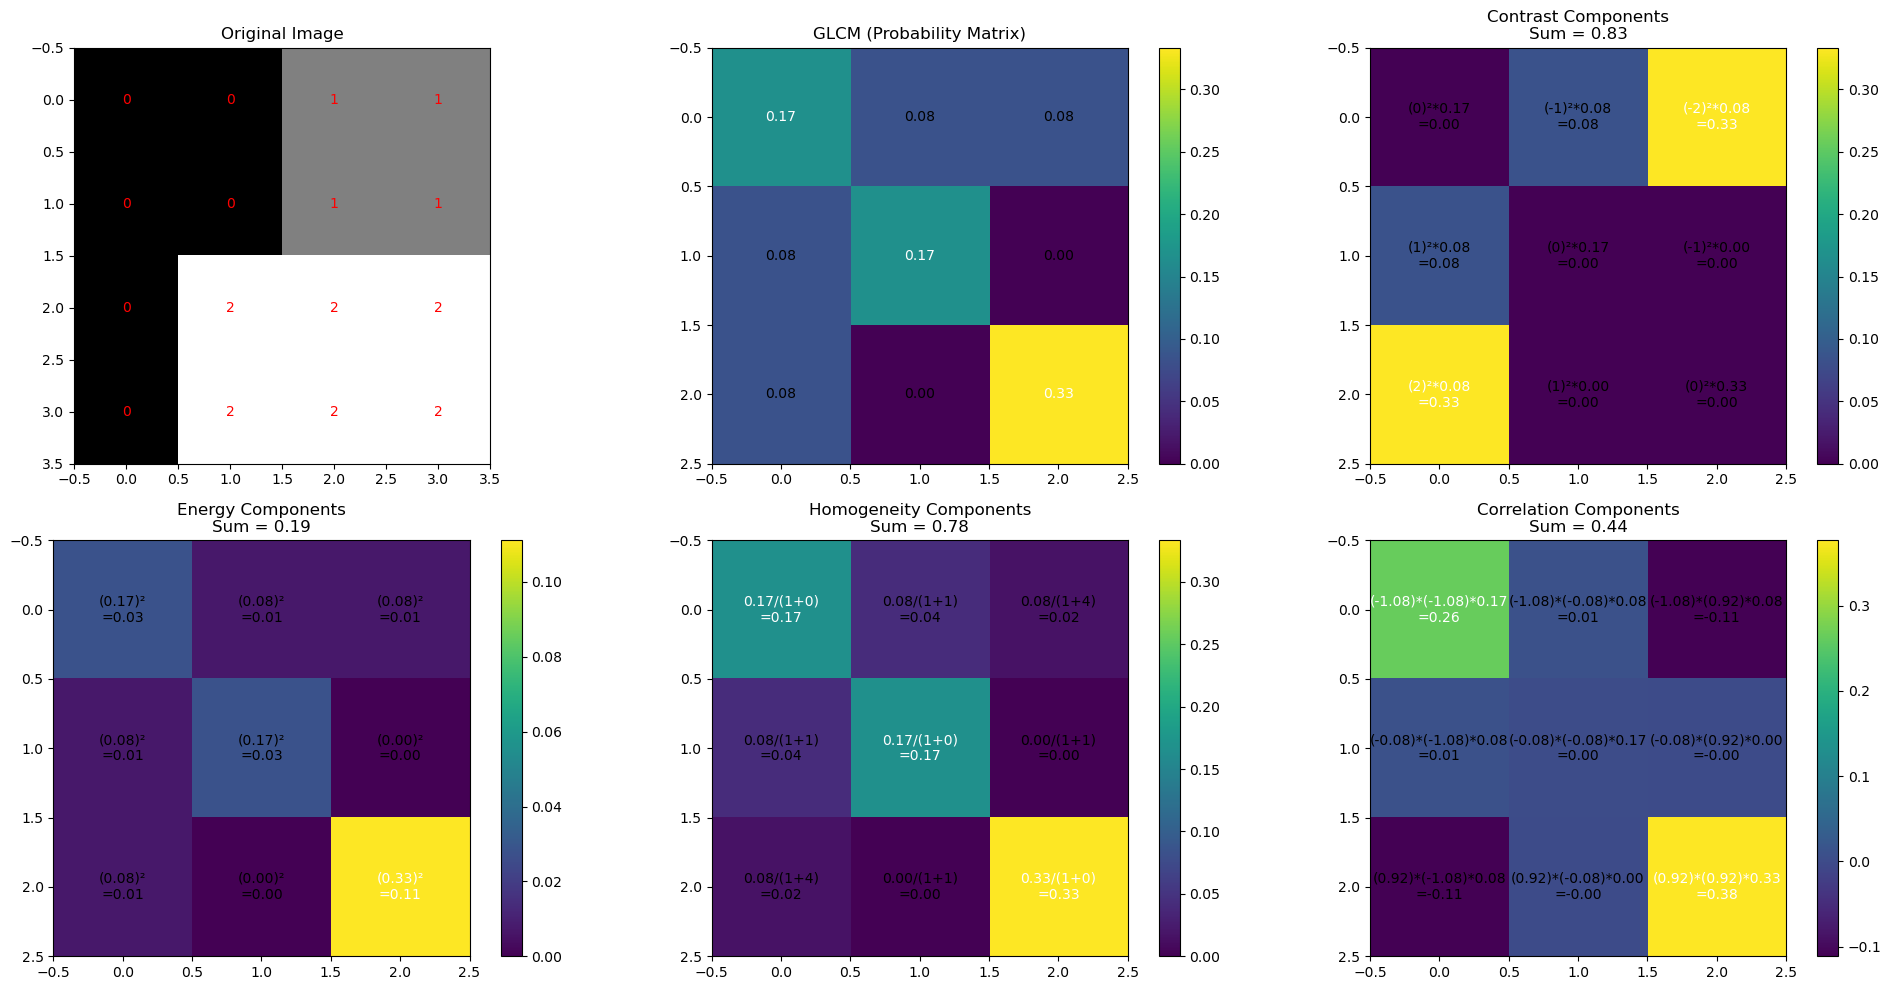


GLCM Features Explanation:

1. Contrast: 0.8333333333333333
   - Measures intensity difference between a pixel and its neighbor
   - High when there are big differences in intensity
   - Formula: Σ(i-j)²P(i,j)
   - Weighted by square of difference

2. Energy: 0.19444444444444445
   - Measures uniformity of texture
   - High when image is very uniform (few gray level transitions)
   - Formula: ΣP(i,j)²
   - Also known as Angular Second Moment

3. Homogeneity: 0.7833333333333333
   - Measures closeness of element distribution to GLCM diagonal
   - High when most pairs are along diagonal (similar values)
   - Formula: ΣP(i,j)/(1+(i-j)²)
   - Weighted inversely by difference squared

4. Correlation: 0.43925233644859824
   - Measures linear dependency of gray levels
   - High when image has a definite pattern
   - Formula: Σ((i-μi)(j-μj)P(i,j))/(σi σj)
   - Uses mean and standard deviation of row/column sums


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 4x4 image with 3 gray levels (0, 1, 2)
image = np.array([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [0, 2, 2, 2],
    [0, 2, 2, 2]
], dtype=np.uint8)

def create_glcm(img, symmetric=True):
    """Create GLCM manually"""
    levels = 3
    glcm = np.zeros((levels, levels), dtype=int)
    rows, cols = img.shape
    
    for i in range(rows):
        for j in range(cols-1):
            reference = img[i, j]
            neighbor = img[i, j+1]
            glcm[reference, neighbor] += 1
            if symmetric:
                glcm[neighbor, reference] += 1
    
    return glcm / glcm.sum()

def calculate_contrast(P):
    """Calculate contrast: Σ(i-j)²P(i,j)
    Measures intensity contrast between pixel and neighbor"""
    contrast = 0
    rows, cols = P.shape
    for i in range(rows):
        for j in range(cols):
            contrast += ((i-j)**2) * P[i,j]
    return contrast

def calculate_energy(P):
    """Calculate energy: Σ(P(i,j)²)
    Measures uniformity of texture"""
    return np.sum(P**2)

def calculate_homogeneity(P):
    """Calculate homogeneity: Σ P(i,j)/(1+(i-j)²)
    Measures closeness of element distribution to diagonal"""
    homogeneity = 0
    rows, cols = P.shape
    for i in range(rows):
        for j in range(cols):
            homogeneity += P[i,j] / (1 + (i-j)**2)
    return homogeneity

def calculate_correlation(P):
    """Calculate correlation: Σ((i-μi)(j-μj)P(i,j))/(σi σj)
    Measures linear dependency of gray levels"""
    rows, cols = P.shape
    i_indices = np.arange(rows).reshape(-1, 1)
    j_indices = np.arange(cols).reshape(1, -1)
    
    # Calculate means and standard deviations
    μi = np.sum(i_indices * P)
    μj = np.sum(j_indices * P)
    σi = np.sqrt(np.sum(((i_indices - μi)**2) * P))
    σj = np.sqrt(np.sum(((j_indices - μj)**2) * P))
    
    if σi == 0 or σj == 0:
        return 0
    
    correlation = 0
    for i in range(rows):
        for j in range(cols):
            correlation += ((i-μi)*(j-μj)*P[i,j])/(σi*σj)
    return correlation

# Calculate GLCM
glcm = create_glcm(image, symmetric=True)

# Create visualization
plt.figure(figsize=(20, 10))

# 1. Show original image
plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(image[i,j]), 
                ha='center', va='center', color='red')

# 2. Show GLCM
plt.subplot(232)
plt.imshow(glcm, cmap='viridis')
plt.title('GLCM (Probability Matrix)')
plt.colorbar()
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{glcm[i,j]:.2f}', 
                ha='center', va='center', color='white' if glcm[i,j] > 0.1 else 'black')

# 3. Contrast Calculation
plt.subplot(233)
contrast_matrix = np.zeros_like(glcm)
for i in range(3):
    for j in range(3):
        contrast_matrix[i,j] = ((i-j)**2) * glcm[i,j]
plt.imshow(contrast_matrix, cmap='viridis')
plt.title(f'Contrast Components\nSum = {calculate_contrast(glcm):.2f}')
plt.colorbar()
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'({i-j})²*{glcm[i,j]:.2f}\n={contrast_matrix[i,j]:.2f}', 
                ha='center', va='center', color='white' if contrast_matrix[i,j] > 0.1 else 'black')

# 4. Energy Calculation
plt.subplot(234)
energy_matrix = glcm**2
plt.imshow(energy_matrix, cmap='viridis')
plt.title(f'Energy Components\nSum = {calculate_energy(glcm):.2f}')
plt.colorbar()
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'({glcm[i,j]:.2f})²\n={energy_matrix[i,j]:.2f}', 
                ha='center', va='center', color='white' if energy_matrix[i,j] > 0.1 else 'black')

# 5. Homogeneity Calculation
plt.subplot(235)
homogeneity_matrix = np.zeros_like(glcm)
for i in range(3):
    for j in range(3):
        homogeneity_matrix[i,j] = glcm[i,j] / (1 + (i-j)**2)
plt.imshow(homogeneity_matrix, cmap='viridis')
plt.title(f'Homogeneity Components\nSum = {calculate_homogeneity(glcm):.2f}')
plt.colorbar()
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{glcm[i,j]:.2f}/(1+{(i-j)**2})\n={homogeneity_matrix[i,j]:.2f}', 
                ha='center', va='center', color='white' if homogeneity_matrix[i,j] > 0.1 else 'black')

# 6. Correlation Calculation
plt.subplot(236)
correlation_matrix = np.zeros_like(glcm)
rows, cols = glcm.shape
i_indices = np.arange(rows).reshape(-1, 1)
j_indices = np.arange(cols).reshape(1, -1)
μi = np.sum(i_indices * glcm)
μj = np.sum(j_indices * glcm)
σi = np.sqrt(np.sum(((i_indices - μi)**2) * glcm))
σj = np.sqrt(np.sum(((j_indices - μj)**2) * glcm))
for i in range(rows):
    for j in range(cols):
        correlation_matrix[i,j] = ((i-μi)*(j-μj)*glcm[i,j])/(σi*σj)
plt.imshow(correlation_matrix, cmap='viridis')
plt.title(f'Correlation Components\nSum = {calculate_correlation(glcm):.2f}')
plt.colorbar()
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'({i-μi:.2f})*({j-μj:.2f})*{glcm[i,j]:.2f}\n={correlation_matrix[i,j]:.2f}', 
                ha='center', va='center', color='white' if correlation_matrix[i,j] > 0.1 else 'black')

plt.tight_layout()
plt.show()

# Print detailed explanation of each feature
print("\nGLCM Features Explanation:")
print("\n1. Contrast:", calculate_contrast(glcm))
print("   - Measures intensity difference between a pixel and its neighbor")
print("   - High when there are big differences in intensity")
print("   - Formula: Σ(i-j)²P(i,j)")
print("   - Weighted by square of difference")

print("\n2. Energy:", calculate_energy(glcm))
print("   - Measures uniformity of texture")
print("   - High when image is very uniform (few gray level transitions)")
print("   - Formula: ΣP(i,j)²")
print("   - Also known as Angular Second Moment")

print("\n3. Homogeneity:", calculate_homogeneity(glcm))
print("   - Measures closeness of element distribution to GLCM diagonal")
print("   - High when most pairs are along diagonal (similar values)")
print("   - Formula: ΣP(i,j)/(1+(i-j)²)")
print("   - Weighted inversely by difference squared")

print("\n4. Correlation:", calculate_correlation(glcm))
print("   - Measures linear dependency of gray levels")
print("   - High when image has a definite pattern")
print("   - Formula: Σ((i-μi)(j-μj)P(i,j))/(σi σj)")
print("   - Uses mean and standard deviation of row/column sums")
